In [13]:
import numpy as np
from skimage.feature import peak_local_max
import SimpleITK as sitk
from utils import *
from random_sampling_neg_block import *

%load_ext autoreload
%autoreload 2

import numpy as np
from skimage.feature import peak_local_max
from utils import *
from random_sampling_neg_block import *


from create_pos_block import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
3* np.sqrt(3)

5.196152422706632

In [9]:
np.sqrt(3)

1.7320508075688772

In [10]:
5.19/2.03
# 5.19/3

2.556650246305419

In [16]:
block

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [20]:
suv_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_5d10be5b89/05-30-2005-NA-PET-CT Ganzkoerper  primaer mit KM-53829/SUV.nii.gz'
import SimpleITK as sitk
full_image = sitk.ReadImage(suv_file_path)
# Get the image array
image_array = sitk.GetArrayFromImage(full_image)

In [13]:
suv_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_5d10be5b89/05-30-2005-NA-PET-CT Ganzkoerper  primaer mit KM-53829/SUV.nii.gz'
import SimpleITK as sitk
full_image = sitk.ReadImage(suv_file_path)
# Get the image array
image_array = sitk.GetArrayFromImage(full_image)

# Specify the indices of the 3x3x3 block you want to extract
start_x, start_y, start_z = 100, 200, 10  # Starting indices
end_x, end_y, end_z = start_x+3, start_y + 3, start_z+3  # Ending indices (exclusive)

# Extract the 3x3x3 block
block = image_array[start_x:end_x, start_y:end_y, start_z:end_z]

# Convert the block to a SimpleITK image
block_image = sitk.GetImageFromArray(block)
block_image.SetSpacing(full_image.GetSpacing())

# Upsample the block using cubic interpolation
resampler = sitk.ResampleImageFilter()
resampler.SetInterpolator(sitk.sitkBSpline)
resampler.SetOutputSpacing(block_image.GetSpacing())
resampler.SetSize((224, 224, 224))

upsampled_block = resampler.Execute(block_image)

# Get the upsampled block as a NumPy array
upsampled_block_array = sitk.GetArrayFromImage(upsampled_block)




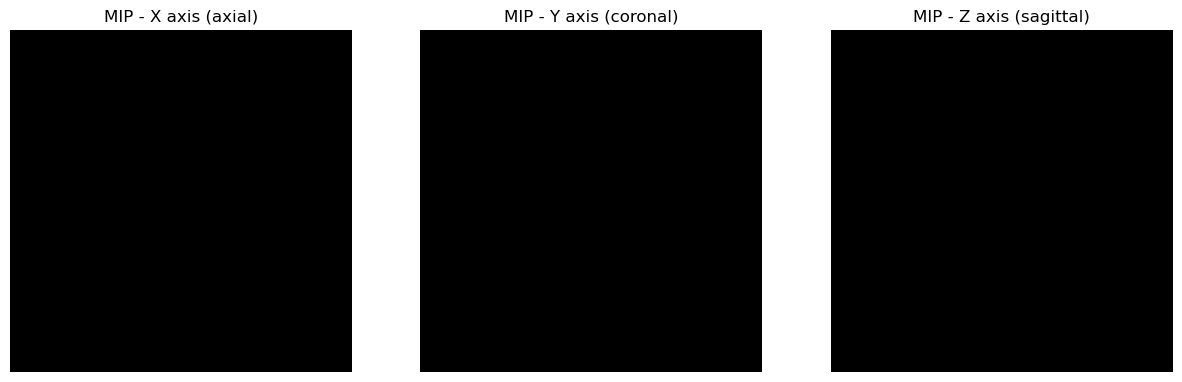

In [9]:
block = upsampled_block_array
mip_x = np.max(block, axis=0) # X-axis projection
mip_y = np.max(block, axis=1) # Y-axis projection
mip_z = np.max(block, axis=2) # Z-axis projection

# Visualize the MIPs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(mip_x, cmap='gray')
axs[0].set_title('MIP - X axis (axial)')
axs[0].axis('off')

axs[1].imshow(mip_y, cmap='gray')
axs[1].set_title('MIP - Y axis (coronal)')
axs[1].axis('off')

axs[2].imshow(mip_z, cmap='gray')
axs[2].set_title('MIP - Z axis (sagittal)')
axs[2].axis('off')

plt.show()

In [15]:
block

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

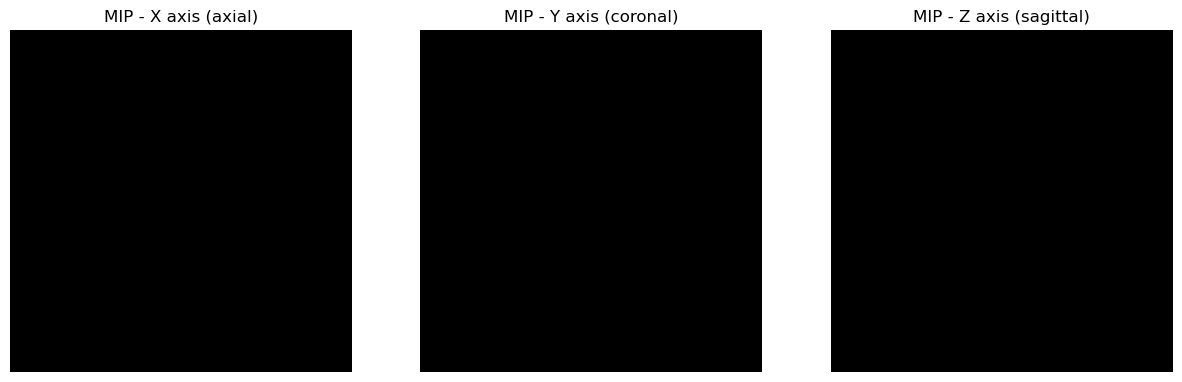

In [14]:
import numpy as np
import matplotlib.pyplot as plt
mip_x = np.max(block, axis=0) # X-axis projection
mip_y = np.max(block, axis=1) # Y-axis projection
mip_z = np.max(block, axis=2) # Z-axis projection

# Visualize the MIPs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(mip_x, cmap='gray')
axs[0].set_title('MIP - X axis (axial)')
axs[0].axis('off')

axs[1].imshow(mip_y, cmap='gray')
axs[1].set_title('MIP - Y axis (coronal)')
axs[1].axis('off')

axs[2].imshow(mip_z, cmap='gray')
axs[2].set_title('MIP - Z axis (sagittal)')
axs[2].axis('off')

plt.show()

In [11]:
# my reso is 2.03 by 2.03 by 3, 
# hongzhi's min_distance in pixel = 3 and he used 3mm^3 reso, 3 pixel min_distance will be 5.19 mm
# with my reso, my min distance in pixel should be = max( 5.19/2.03, 5.19/3) = 2.55 => 3 as well


In [2]:
import nibabel as nib
# suv_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_0b57b247b6/05-02-2002-NA-PET-CT Ganzkoerper  primaer mit KM-42966/SUV.nii.gz'
suv_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_5d10be5b89/05-30-2005-NA-PET-CT Ganzkoerper  primaer mit KM-53829/SUV.nii.gz'
seg_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_5d10be5b89/05-30-2005-NA-PET-CT Ganzkoerper  primaer mit KM-53829/SEG.nii.gz'
# seg_file_path = '/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/Data/PETCT_0b57b247b6/05-02-2002-NA-PET-CT Ganzkoerper  primaer mit KM-42966/SEG.nii.gz'
suv_img = nib.load(suv_file_path)
seg_img = nib.load(seg_file_path)
suv_data = suv_img.get_fdata()
seg_data = seg_img.get_fdata()
pix_dim = suv_img.header['pixdim'][1:4]

In [5]:
from skimage.feature import peak_local_max
R=3
TH=2.0
local_max=peak_local_max(suv_data,min_distance=R,threshold_abs=TH)

In [124]:
separate_segmentation_masks = get_connected_components_3D(seg_data)

In [125]:
len(separate_segmentation_masks)

46

In [126]:
def filter_separate_segmentation_mask_by_diameter_and_SUV_max_and_voxel_of_interest(suv_data, voxel_dimensions, separate_segmentation_masks, diameter_in_cm = 6, SUV_max = 3, voxel_of_interst = 3):
    '''
    This function filters the separate segmentation masks by diameter and SUV_max to remove noise ground truth and then obtain tumor with voxel_of_interest
    '''
    # filtered_separate_segmentation_masks = {}
    filtered_separate_segmentation_masks = []
    if len(separate_segmentation_masks) == 0:
        return filtered_separate_segmentation_masks
    for idx, mask in enumerate(separate_segmentation_masks):
        #count the number of voxels in the mask
        num_voxels = np.sum(mask)
        #the volume of each voxel is the product of its dimensions
        tumor_volume = num_voxels * np.prod(voxel_dimensions)/1000
        mask_diameter = np.round(get_diameter_from_sphere_volume(tumor_volume),4)
        mask_SUV_max = suv_data[mask].max()
        # print(f"num_voxels: {num_voxels} tumor volume: {tumor_volume} diameter:{mask_diameter}")
        if (mask_diameter >= diameter_in_cm or mask_SUV_max >= SUV_max) and num_voxels <= voxel_of_interst:
            # filtered_separate_segmentation_masks[idx] = mask
            filtered_separate_segmentation_masks.append(mask)

    return filtered_separate_segmentation_masks


In [127]:
filtered_separate_segmentation_masks = filter_separate_segmentation_mask_by_diameter_and_SUV_max_and_voxel_of_interest(suv_data, pix_dim, separate_segmentation_masks, diameter_in_cm = 0.6, SUV_max = 3, voxel_of_interst = 3)
len(filtered_separate_segmentation_masks)

26

In [120]:
filtered_separate_segmentation_masks

[]

In [ ]:
# positive_local_max = []
# negative_local_max = []
# for local_max_point in local_max:
#     for key, value in filtered_separate_segmentation_masks:
#         if value[local_max_point[0], local_max_point[1], local_max_point[2]] == 1:
#             positive_local_max.append(local_max_point)
#     if 



#         positive_local_max.append(local_max_point)


In [4]:
pos_xyz_coordinates

[(172, 185, 132),
 (172, 186, 132),
 (173, 178, 187),
 (173, 178, 188),
 (173, 179, 187),
 (173, 179, 188),
 (173, 179, 189),
 (173, 180, 187),
 (173, 180, 188),
 (173, 180, 189),
 (173, 180, 190),
 (173, 181, 187),
 (173, 181, 188),
 (173, 181, 189),
 (173, 181, 190),
 (174, 177, 186),
 (174, 177, 187),
 (174, 177, 188),
 (174, 177, 189),
 (174, 178, 185),
 (174, 178, 186),
 (174, 178, 187),
 (174, 178, 188),
 (174, 178, 189),
 (174, 178, 190),
 (174, 179, 185),
 (174, 179, 186),
 (174, 179, 187),
 (174, 179, 188),
 (174, 179, 189),
 (174, 179, 190),
 (174, 180, 185),
 (174, 180, 186),
 (174, 180, 187),
 (174, 180, 188),
 (174, 180, 189),
 (174, 180, 190),
 (174, 181, 186),
 (174, 181, 187),
 (174, 181, 188),
 (174, 181, 189),
 (174, 181, 190),
 (174, 182, 186),
 (174, 182, 187),
 (174, 182, 188),
 (174, 182, 189),
 (174, 182, 190),
 (174, 183, 187),
 (174, 183, 188),
 (174, 183, 189),
 (174, 183, 190),
 (174, 184, 188),
 (174, 184, 189),
 (174, 184, 190),
 (175, 176, 187),
 (175, 176

In [10]:
pos_xyz_coordinates

array([[172, 185, 132],
       [172, 186, 132],
       [173, 178, 187],
       ...,
       [242, 198, 112],
       [242, 199, 111],
       [242, 200, 111]])

In [9]:
import numpy as np

# Assuming binary_array is your 3D binary array
# For example:
# binary_array = np.random.randint(2, size=(5, 5, 5))  # Generates a 5x5x5 binary array as an example

# Find the indices where the value is 1
coordinates = np.where(seg_data == 1)

# The returned coordinates are in the form of (x_indices, y_indices, z_indices)
# To get a list of (x, y, z) tuples:
pos_xyz_coordinates = np.array(list(zip(coordinates[0], coordinates[1], coordinates[2])))

# print("Coordinates where value is 1:")
# for coord in xyz_coordinates:
#     print(coord)


In [16]:
sample_neg_block(seg_data, pos_xyz_coordinates, negative=False)

success_count: 0
success_count: 1
success_count: 2
success_count: 3
success_count: 4
success_count: 5
success_count: 6
success_count: 7
success_count: 8
success_count: 9


[(196, 174, 196),
 (219, 201, 101),
 (209, 200, 138),
 (240, 198, 111),
 (195, 204, 94),
 (207, 210, 103),
 (199, 208, 50),
 (202, 201, 86),
 (198, 198, 89),
 (209, 184, 53)]

In [70]:
# Define two arrays of tuples
array1 = [(1, 2), (3, 4), (5, 6)]
array2 = [(3, 4), (5, 7), (8, 9)]

# Convert arrays to sets
set1 = set(array1)
set2 = set(array2)

# Find the difference (elements in set1 but not in set2)
difference = set1.difference(set2)

# Convert back to a list of tuples if needed
result = list(difference)

print("Elements in the first set but not in the second:", result)


Elements in the first set but not in the second: [(1, 2), (5, 6)]


In [130]:
local_max

array([[213, 201,  49],
       [221, 203,  50],
       [214, 203,  54],
       ...,
       [271, 193, 179],
       [208, 136,   7],
       [189, 178, 276]])

In [139]:
# pos_xyz_coordinates = np.zeros_like(seg_data)
# pos_output_coord_list = []
# for i in range(len(filtered_separate_segmentation_masks)):
#     pos_xyz_coordinates[filtered_separate_segmentation_masks[i] == 1] = 1
    # The returned coordinates are in the form of (x_indices, y_indices, z_indices)
    # To get a list of (x, y, z) tuples:
# pos_xyz_coordinates = np.where(pos_xyz_coordinates == 1)
# The returned coordinates are in the form of (x_indices, y_indices, z_indices)
# To get a list of (x, y, z) tuples:
# pos_xyz_coordinates = list(zip(pos_xyz_coordinates[0], pos_xyz_coordinates[1], pos_xyz_coordinates[2]))

# Convert the list of arrays to a NumPy array for efficient computation
stacked_arrays = np.stack(filtered_separate_segmentation_masks)

# Use np.logical_or.reduce to merge all 1s across the stacked arrays
merged_array = np.logical_or.reduce(stacked_arrays, axis=0)

# If you need the result as integers (0 and 1)
merged_mask = merged_array.astype(int)
coordinates = np.where(merged_mask == 1)
pos_xyz_coordinates = list(zip(coordinates[0], coordinates[1], coordinates[2]))
local_max_points_coordinate_intersect_pos_coord = set([tuple(inner_list) for inner_list in local_max]).intersection(set(pos_xyz_coordinates))

In [140]:
local_max_points_coordinate_intersect_pos_coord

{(221, 190, 84)}

In [ ]:
import numpy as np

# Example setup
block_size = (3,3,3)
N = len(local_max_points_coordinate_intersect_pos_coord)  # Number of coordinates
local_max_points_coordinate_intersect_pos_coord = np.array(local_max_points_coordinate_intersect_pos_coord)
seg_data_shape = np.array(seg_data.shape)  # seg_data.shape should be (depth, height, width)
block_size = np.array(block_size)  # block_size should be [size_x, size_y, size_z]

# Calculate half sizes for each dimension
half_size = block_size // 2

# Calculate start positions ensuring they are within the valid range
start = np.maximum(local_max_points_coordinate_intersect_pos_coord - half_size, 0)
end = np.minimum(start + block_size, seg_data_shape)

# Correct the start positions if the block exceeds the segmentation data dimensions
for dim in range(3):  # Loop over each dimension
    overshoot = end[:, dim] - seg_data_shape[dim]
    start[:, dim] -= overshoot * (overshoot > 0)

# Ensure the block is within the valid range after adjustment
start = np.maximum(start, 0)
end = np.minimum(start + block_size, seg_data_shape)

# Adjustments to ensure end does not exceed seg_data_shape and start does not become negative
end = np.clip(end, None, seg_data_shape)  # Ensure 'end' does not exceed seg_data_shape
start = np.clip(start, 0, None)  # Ensure 'start' does not go below 0



In [19]:
# local_max_points_coordinate_without_pos_coord= list(set([tuple(inner_list) for inner_list in local_max]).difference(set(pos_xyz_coordinates)))

In [20]:
# local_max_points_coordinate_without_pos_coord

[(142, 182, 71),
 (184, 205, 142),
 (194, 166, 225),
 (193, 202, 266),
 (172, 152, 67),
 (158, 150, 127),
 (195, 180, 128),
 (173, 159, 160),
 (244, 176, 30),
 (241, 137, 158),
 (178, 244, 257),
 (219, 146, 77),
 (237, 151, 157),
 (191, 174, 61),
 (171, 181, 43),
 (195, 172, 165),
 (180, 154, 132),
 (255, 151, 194),
 (167, 179, 33),
 (230, 190, 155),
 (201, 169, 173),
 (243, 173, 113),
 (249, 177, 105),
 (206, 158, 221),
 (260, 150, 143),
 (205, 140, 56),
 (158, 168, 14),
 (151, 118, 3),
 (145, 172, 157),
 (211, 166, 70),
 (138, 178, 6),
 (197, 196, 267),
 (232, 153, 162),
 (238, 146, 144),
 (219, 162, 155),
 (256, 205, 151),
 (158, 167, 26),
 (243, 183, 176),
 (220, 170, 40),
 (163, 172, 14),
 (149, 188, 127),
 (186, 154, 143),
 (248, 173, 157),
 (233, 212, 193),
 (141, 165, 46),
 (203, 112, 35),
 (156, 193, 148),
 (198, 163, 127),
 (149, 192, 138),
 (155, 189, 234),
 (146, 191, 149),
 (201, 187, 73),
 (170, 200, 140),
 (201, 183, 39),
 (198, 186, 232),
 (156, 163, 161),
 (268, 192, 1

In [112]:
sample_size = 100
block_size = (3,3,3)
sample_neg_block(seg_data,local_max,block_size, sample_size, negative=True)

[(192, 214, 187),
 (212, 151, 154),
 (200, 187, 244),
 (205, 164, 37),
 (147, 180, 138),
 (207, 219, 124),
 (179, 158, 19),
 (207, 226, 182),
 (154, 174, 148),
 (258, 130, 6),
 (264, 220, 135),
 (188, 209, 174),
 (173, 175, 55),
 (145, 155, 168),
 (181, 195, 77),
 (172, 197, 245),
 (206, 200, 203),
 (165, 190, 143),
 (270, 198, 211),
 (165, 167, 10),
 (228, 181, 51),
 (241, 154, 164),
 (165, 190, 143),
 (220, 223, 155),
 (200, 161, 171),
 (183, 240, 242),
 (250, 167, 51),
 (182, 179, 149),
 (257, 162, 156),
 (211, 214, 287),
 (187, 140, 180),
 (201, 212, 18),
 (262, 182, 56),
 (170, 231, 268),
 (170, 231, 268),
 (266, 193, 122),
 (190, 142, 170),
 (289, 189, 236),
 (197, 247, 243),
 (211, 157, 152),
 (137, 190, 184),
 (211, 161, 192),
 (207, 193, 182),
 (252, 167, 126),
 (231, 218, 146),
 (141, 196, 217),
 (203, 240, 237),
 (229, 173, 44),
 (261, 181, 104),
 (147, 159, 197),
 (203, 259, 283),
 (218, 177, 92),
 (201, 164, 85),
 (198, 194, 264),
 (250, 167, 51),
 (168, 188, 226),
 (240, 

In [65]:
filtered_separate_segmentation_masks

{14: array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, Fal

In [113]:
get_tumor_under_threshold_blocks_per_study(filtered_separate_segmentation_masks,
                                           block_size)

Processing filtered positive tumors:   0%|          | 0/26 [00:00<?, ?it/s]

Processing filtered positive tumors: 100%|██████████| 26/26 [00:06<00:00,  3.85it/s]


[(214, 200, 59),
 (194, 186, 70),
 (213, 180, 82),
 (219, 188, 83),
 (220, 182, 90),
 (220, 198, 90),
 (222, 199, 90),
 (200, 186, 91),
 (211, 193, 93),
 (201, 181, 105),
 (214, 192, 113),
 (201, 181, 115),
 (189, 194, 116),
 (194, 200, 117),
 (212, 184, 124),
 (189, 193, 125),
 (171, 184, 131),
 (191, 189, 131),
 (191, 192, 132),
 (206, 203, 141),
 (211, 183, 143),
 (228, 189, 144),
 (214, 177, 145),
 (188, 182, 187),
 (189, 183, 204),
 (193, 174, 220)]

In [102]:
def scale_up_block(input_block, new_resol = [224,224,3], interpolation = 'cubic'):
    # Convert the input numpy array to a SimpleITK Image
    input_image = sitk.GetImageFromArray(input_block.astype(np.float32))
    # Define the new size
    new_size = new_resol
    # Compute the scaling factors for each dimension
    scaling_factors = [float(new_size[0]) / input_image.GetSize()[0], 
                       float(new_size[1]) / input_image.GetSize()[1], 
                       float(new_size[2]) / input_image.GetSize()[2]]
    # Create a resampling filter
    resample_filter = sitk.ResampleImageFilter()
    # Set the output image size
    resample_filter.SetSize(new_size)

    # Set the interpolator. 
    if interpolation == 'cubic':
        resample_filter.SetInterpolator(sitk.sitkBSpline)
    # For cubic interpolation, change to sitk.sitkBSpline.
    if interpolation == 'linear':
        resample_filter.SetInterpolator(sitk.sitkLinear)
    # Calculate new spacing based on the scaling factors
    original_spacing = input_image.GetSpacing()
    new_spacing = [original_spacing[0] / scaling_factors[0], 
                   original_spacing[1] / scaling_factors[1], 
                   original_spacing[2] / scaling_factors[2]]
    resample_filter.SetOutputSpacing(new_spacing)
    # Set the output origin, to keep it same as input
    resample_filter.SetOutputOrigin(input_image.GetOrigin())

    # Set the output direction, to keep it same as input
    resample_filter.SetOutputDirection(input_image.GetDirection())

    # Perform the resampling
    resampled_image = resample_filter.Execute(input_image)

    # Convert the resampled SimpleITK image to a NumPy array
    resampled_array = sitk.GetArrayFromImage(resampled_image)
    print(resampled_array.shape)

    # Transpose the array to match the conventional (height, width, channels) format
    resampled_array_np = np.transpose(resampled_array, (1, 2, 0))
    print(resampled_array_np.shape)

    # Return the resampled array
    return resampled_array_np

    


In [98]:
import SimpleITK as sitk
import numpy as np

# Create a 3x3x3 image (block)
input_image = sitk.GetImageFromArray(np.random.rand(3, 3, 3).astype(np.float32))

# Define the new size: 224x224x3
new_size = [224, 224, 3]

# Compute the scaling factors for each dimension
scaling_factors = [new_size[0] / input_image.GetSize()[0], new_size[1] / input_image.GetSize()[1], new_size[2] / input_image.GetSize()[2]]

# Create a resampling filter
resample_filter = sitk.ResampleImageFilter()

# Set the output image size
resample_filter.SetSize(new_size)

# Set the interpolator. For linear interpolation use sitk.sitkLinear, for cubic (B-spline) use sitk.sitkBSpline
# Uncomment the interpolator you want to use
# resample_filter.SetInterpolator(sitk.sitkLinear)
resample_filter.SetInterpolator(sitk.sitkBSpline)

# Set the output spacing. The new spacing is the original spacing divided by the scaling factor
original_spacing = input_image.GetSpacing()
new_spacing = [original_spacing[0] / scaling_factors[0], original_spacing[1] / scaling_factors[1], original_spacing[2] / scaling_factors[2]]
resample_filter.SetOutputSpacing(new_spacing)

# Set the output origin (optional, but often necessary)
resample_filter.SetOutputOrigin(input_image.GetOrigin())

# Set the output direction (optional, but often necessary)
resample_filter.SetOutputDirection(input_image.GetDirection())

# Perform the resampling
resampled_image = resample_filter.Execute(input_image)

# Convert the resampled image to a NumPy array (if needed)
resampled_array = sitk.GetArrayFromImage(resampled_image)

# Convert the resampled SimpleITK image to a NumPy array
resampled_array_sitk = sitk.GetArrayFromImage(resampled_image)

# Transpose the array to match the conventional (height, width, channels) format
resampled_array_np = np.transpose(resampled_array_sitk, (1, 2, 0))

# Now, resampled_array_np has the shape (224, 224, 3)
# Now, resampled_array contains the resampled block of size 224x224x3


In [100]:
resampled_array_np.shape

(224, 224, 3)

In [103]:
input_block = np.random.rand(3, 3, 3)
upsampled_block = scale_up_block(input_block)
print("Upsampled Block Shape:", upsampled_block.shape)

(3, 224, 224)
(224, 224, 3)
Upsampled Block Shape: (224, 224, 3)


In [6]:
import numpy as np

In [11]:
array = np.load("/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/400_by_400 ct_dataset.npy", allow_pickle=True)

In [9]:
array = np.load('/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/ori_reso_all_labels.npy', 
                allow_pickle=True)

In [12]:
array.shape

(1230, 3, 3, 3)